# Read the data and explore it

In [ ]:
import pandas as pd

file_path = r"C:\Users\rasha\Downloads\Sapaq news headlines.xlsx"

sheet_name = "data with final annotation"
df = pd.read_excel(file_path, sheet_name=sheet_name)

df.head()


,News Headlines,category,Final sentiment Annotation
0,أندية سعودية تنافس الدوري التركي للتعاقد مع لا...,Sport,Positive
1,"""الصادق"" يعتذر عن الاستمرار في منصب مدير المنت...",Sport,Neutral
2,"""الاتحاد"" يخطف الصدارة من ""الهلال"".. فوز ثمين ...",Sport,Positive
3,"بثنائية الفتح.. جماهير الاتحاد تُردِّد: ""صدارة...",Sport,Positive
4,"قطع في ""الرباط الصليبي"" يصيب لاعب الشباب ""الصب...",Sport,Negative


In [ ]:
df.info()

df.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 499 entries, 0 to 498
Data columns (total 3 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   News Headlines               499 non-null    object
 1   category                     499 non-null    object
 2   Final sentiment Annotation   499 non-null    object
dtypes: object(3)
memory usage: 11.8+ KB


News Headlines                 0
category                       0
Final sentiment Annotation     0
dtype: int64

<span style="font-size:16px;">There is no null data, which is perfect!</span>


# Remove stop words and save the cleaned data into a third sheet in the same Excel file

In [ ]:
stop_words = ["في", "على", "من", "إلى", "عن"]

def remove_stop_words(text):
    words = text.split()
    filtered_words = [word for word in words if word not in stop_words]
    return ' '.join(filtered_words)

df['News Headlines'] = df['News Headlines'].apply(remove_stop_words)

output_file_path = r"C:\Users\rasha\Downloads\Sapaq news headlines.xlsx"

with pd.ExcelWriter(output_file_path, mode="a", engine="openpyxl", if_sheet_exists="replace") as writer:
    df.to_excel(writer, sheet_name="Cleaned Data", index=False)

print("Stop words removed and cleaned data successfully saved to the 'Cleaned Data' sheet.")


Stop words removed and cleaned data successfully saved to the 'Cleaned Data' sheet.


# Visualize the distribution of categories using a bar chart:

C:\Users\rasha\AppData\Local\Temp\ipykernel_20276\1034419801.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=category_counts.index, y=category_counts.values, palette="viridis")


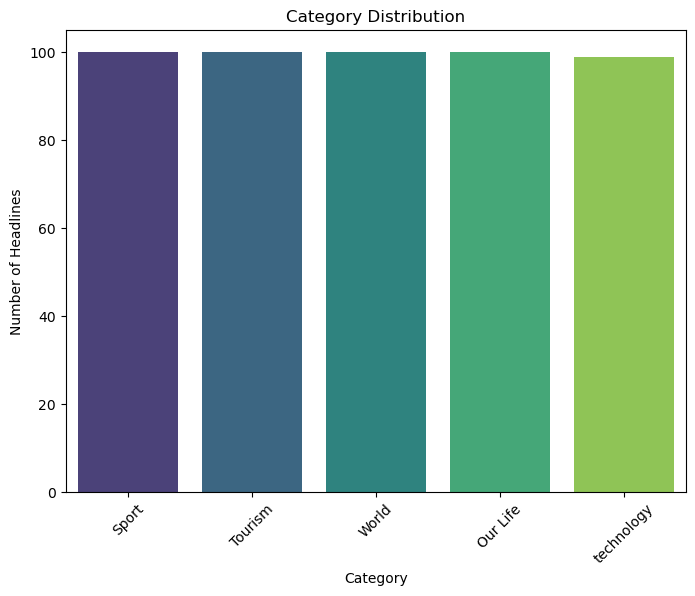

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

sheet_name = "Cleaned Data"
df = pd.read_excel(file_path, sheet_name=sheet_name)

category_counts = df['category'].value_counts()  # Use the correct column name

plt.figure(figsize=(8, 6))
sns.barplot(x=category_counts.index, y=category_counts.values, palette="viridis")
plt.title("Category Distribution")
plt.xlabel("Category")
plt.ylabel("Number of Headlines")
plt.xticks(rotation=45)
plt.show()



<span style="font-size:16px;">Five categories are equally represented (Tourism, Sport, World, Our Life, Technology), each having approximately 100 headlines.

This uniform distribution indicates balanced coverage across diverse areas, ensuring no single category dominates.</span>


# Sentiment Distribution

# Create a pie chart to show the sentiment distribution:

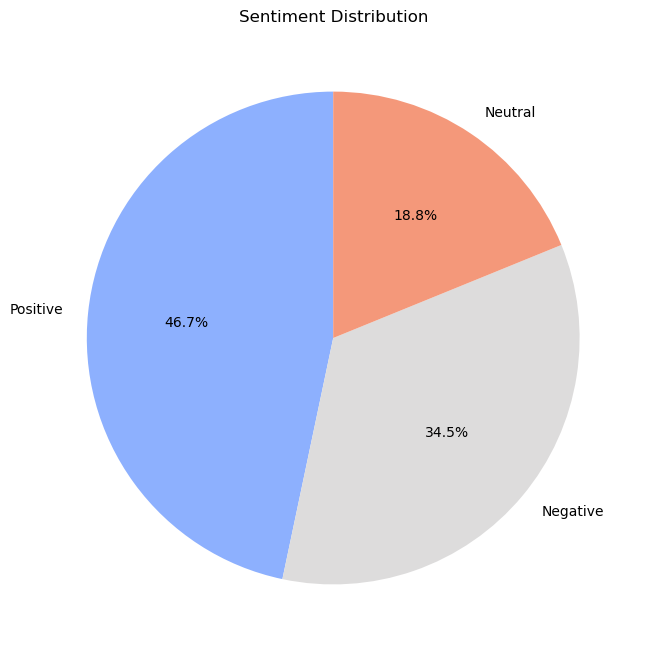

In [ ]:
sentiment_counts = df['Final sentiment Annotation '].value_counts()

plt.figure(figsize=(8, 8))
plt.pie(sentiment_counts.values, labels=sentiment_counts.index, autopct='%1.1f%%', startangle=90, colors=sns.color_palette("coolwarm", len(sentiment_counts)))
plt.title("Sentiment Distribution")
plt.show()

Positive Sentiment: Represents 46.7% of the headlines, indicating that almost half of the news content conveys a positive tone.

Negative Sentiment: Accounts for 34.5%, showing that a significant portion has a negative tone.

Neutral Sentiment: Makes up 18.8%, reflecting impartial or fact-based reporting.

Overall, the majority of the headlines (65.5%) are either positive or neutral, suggesting a balance toward optimism.

# Most Common Words
#
Generate frequent words from the News Headlines column

C:\Users\rasha\AppData\Local\Temp\ipykernel_20276\4076303421.py:33: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Frequency', y='Word', data=pos_df, palette="Blues_d")


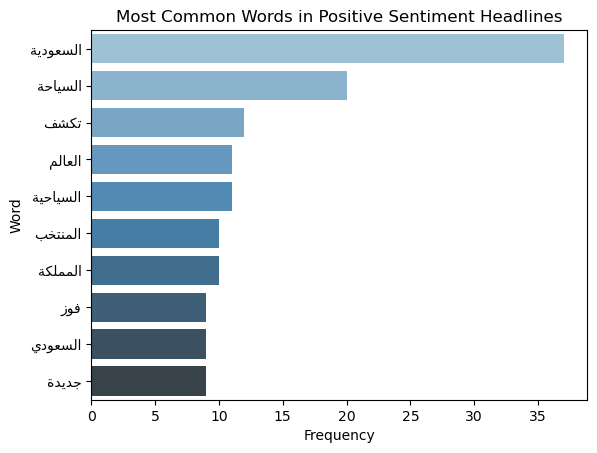

In [ ]:
from collections import Counter
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from arabic_reshaper import reshape
from bidi.algorithm import get_display


def get_most_common_words(df, sentiment, num_words=10):
    headlines = df[df['Final sentiment Annotation '] == sentiment]['News Headlines']
    all_words = ' '.join(headlines).split()
    filtered_words = [word for word in all_words if word not in stop_words]
    word_counts = Counter(filtered_words)

    return word_counts.most_common(num_words)


positive_words = get_most_common_words(df, 'Positive', num_words=10)

reshaped_words = [
    (get_display(reshape(word)), freq) for word, freq in positive_words
]

pos_df = pd.DataFrame(reshaped_words, columns=['Word', 'Frequency'])

sns.barplot(x='Frequency', y='Word', data=pos_df, palette="Blues_d")
plt.title("Most Common Words in Positive Sentiment Headlines")
plt.xlabel("Frequency")
plt.ylabel("Word")
plt.show()


The chart displays the most frequent words in positive sentiment Arabic headlines, with words like the ones shown in Arabic text (e.g., "السعودية," "السياحة," and others). These terms likely emphasize common themes in positive news, such as:

السعودية (Saudi Arabia): Indicates frequent coverage of positive developments or initiatives related to Saudi Arabia.

العالم (Global): Points to internationally relevant achievements.

السياحية (Tourism): Highlights growth and positive news in the tourism sector.

These keywords underline a focus on progress, achievements, and global and local advancements in positive headlines.

**Most Common Words in Negative Sentiments**


C:\Users\rasha\AppData\Local\Temp\ipykernel_20276\532013092.py:32: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Frequency', y='Word', data=neg_df, palette="Reds_d")


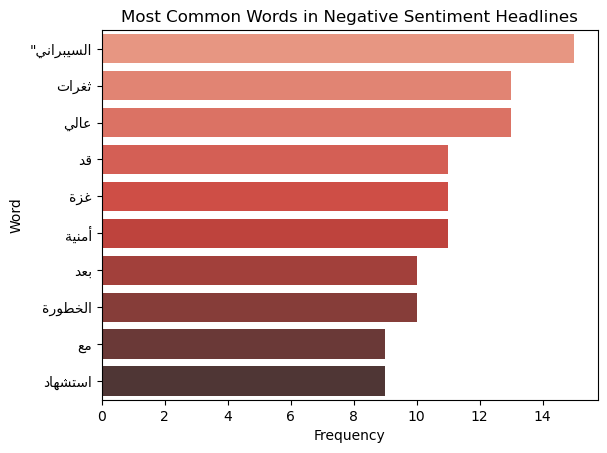

In [ ]:
from collections import Counter
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from arabic_reshaper import reshape
from bidi.algorithm import get_display


def get_most_common_words(df, sentiment, num_words=10):

    headlines = df[df['Final sentiment Annotation '] == sentiment]['News Headlines']

    all_words = ' '.join(headlines).split()

    filtered_words = [word for word in all_words if word not in stop_words]

    word_counts = Counter(filtered_words)
    return word_counts.most_common(num_words)


negative_words = get_most_common_words(df, 'Negative', num_words=10)

reshaped_words = [
    (get_display(reshape(word)), freq) for word, freq in negative_words
]


neg_df = pd.DataFrame(reshaped_words, columns=['Word', 'Frequency'])

sns.barplot(x='Frequency', y='Word', data=neg_df, palette="Reds_d")
plt.title("Most Common Words in Negative Sentiment Headlines")
plt.xlabel("Frequency")
plt.ylabel("Word")
plt.show()


Interpretation:
Dominant Words:

"السيبراني" (cyber) and "ثغرات" (vulnerabilities) suggest frequent references to cybersecurity risks in negative headlines.
Themes:

Words like "غزة" (Gaza), "أمنية" (security), and "الخطورة" (danger) highlight a focus on conflicts and safety concerns.
Tone:

Frequent use of "بعد" (after) and "قد" (may) reflects a reactive or speculative tone.
Overall, the words indicate a focus on security risks, conflicts, and vulnerabilities in negative sentiment headlines.

# Category vs. Sentiment Heatmap

# Analyze the relationship between Label and Final sentiment annotation.

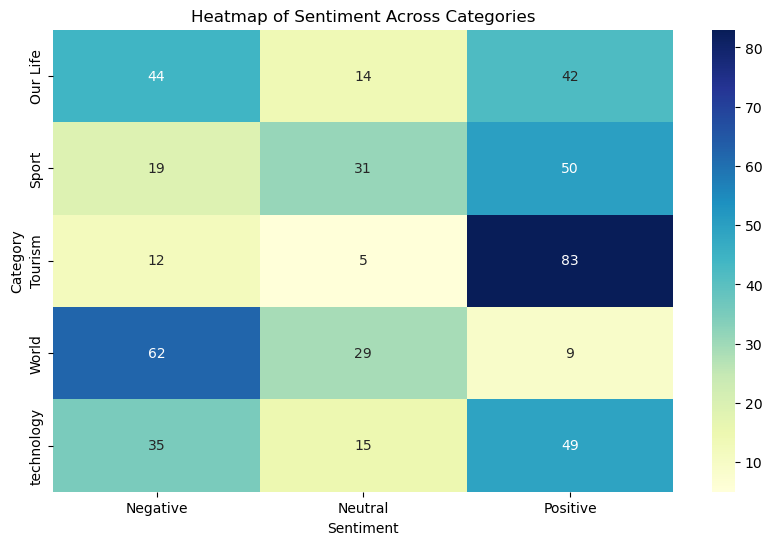

In [ ]:
pivot = df.pivot_table(index='category', columns='Final sentiment Annotation ', aggfunc='size', fill_value=0)

plt.figure(figsize=(10, 6))
sns.heatmap(pivot, annot=True, fmt='d', cmap="YlGnBu", cbar=True)
plt.title("Heatmap of Sentiment Across Categories")
plt.xlabel("Sentiment")
plt.ylabel("Category")
plt.show()


This heatmap visualizes the frequency of sentiments (Negative, Neutral, Positive) across various categories like "Our Life," "Sport," "Tourism," etc.

Interpretation:

Category-Specific Trends:

Tourism: Dominantly positive, indicating an optimistic tone in this category.

World News: Heavily skewed toward negative sentiment, reflecting critical or concerning issues often covered in world-related news.

Sport: Fairly balanced distribution, with slightly higher positive and neutral tones, which aligns with the diversity in sports coverage.

Technology: A significant positive sentiment but also a notable amount of negativity, perhaps reflecting mixed opinions on tech innovations or failures.

Our Life: A balanced spread but with slightly more negative tones compared to others.

Insights: Tourism is the most positive category, whereas World News is the most negative. This indicates differing tones across subject matter.

# Headline Length Analysis

Analyze the lengths of News Headlines.



C:\Users\rasha\AppData\Local\Temp\ipykernel_20276\3286494591.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Final sentiment Annotation ', y='Headline Length', data=df, palette="Set2")


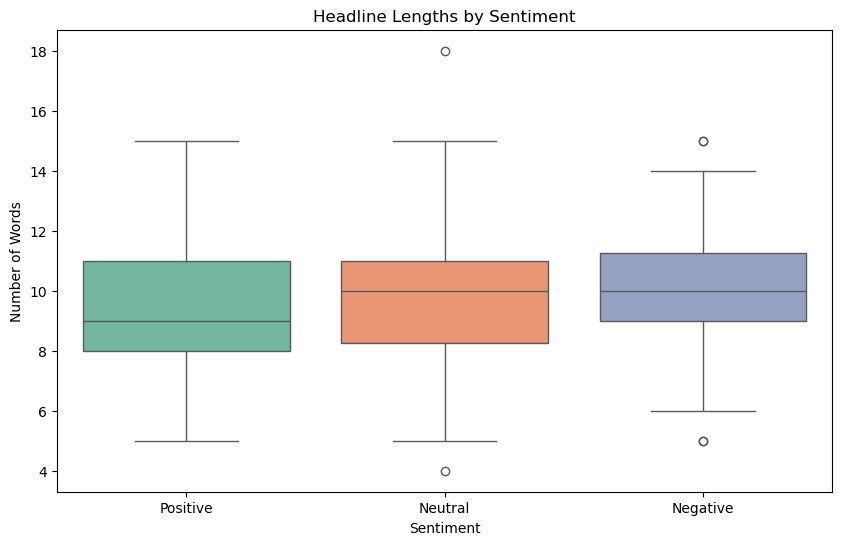

In [ ]:
df['Headline Length'] = df['News Headlines'].apply(lambda x: len(str(x).split()))

plt.figure(figsize=(10, 6))
sns.boxplot(x='Final sentiment Annotation ', y='Headline Length', data=df, palette="Set2")
plt.title("Headline Lengths by Sentiment")
plt.xlabel("Sentiment")
plt.ylabel("Number of Words")
plt.show()

This boxplot shows the distribution of the number of words in news headlines, grouped by sentiment (Positive, Neutral, Negative).

Interpretation:

Median Lengths: Neutral headlines tend to have slightly shorter median word counts compared to Positive and Negative headlines.

Variability: Negative headlines exhibit a broader range of lengths, suggesting variability in the way negative sentiments are expressed. Positive and Neutral sentiments are more compact in terms of word usage.

Outliers: Some headlines in Neutral and Negative sentiments are much longer than the average, as indicated by the outliers.